In [65]:
import torch
import torchvision
from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import FashionMNIST
from matplotlib import pyplot as plt

In [66]:
# Convert vector to image
def to_img(x):
    x = 0.5 * (x + 1)
    x = x.view(x.size(0), 28, 28)
    return x

In [67]:
bs = 1000 # batch size

transform = transforms.Compose([transforms.ToTensor()])

traindataset = FashionMNIST('./data', download=True, train=True, transform=transform)
testdataset = FashionMNIST('./data', download=True, train=False, transform=transform)

# Loaders
trainloader = torch.utils.data.DataLoader(traindataset, batch_size=bs, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testdataset, batch_size=bs, shuffle=False, num_workers=4)

In [68]:
# Displaying routine
def display_images(in_, out, n=1):
    for N in range(n):
        if in_ is not None:
            in_pic = to_img(in_.cpu().data)
            plt.figure(figsize=(18, 6))
            for i in range(4):
                plt.subplot(1,4,i+1)
                plt.imshow(in_pic[i+4*N])
                plt.axis('off')
        out_pic = to_img(out.cpu().data)
        plt.figure(figsize=(18, 6))
        for i in range(4):
            plt.subplot(1,4,i+1)
            plt.imshow(out_pic[i+4*N])
            plt.axis('off')

In [69]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(
        nn.Linear(28*28, 100),
        nn.ReLU())
        
        self.decoder = nn.Sequential(
        nn.Linear(100, 28*28),
        nn.ReLU())
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [70]:
model_ae = AutoEncoder()

In [71]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_ae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0415
epoch [2/10], loss:0.0287
epoch [3/10], loss:0.0250
epoch [4/10], loss:0.0223
epoch [5/10], loss:0.0214
epoch [6/10], loss:0.0200
epoch [7/10], loss:0.0190
epoch [8/10], loss:0.0180
epoch [9/10], loss:0.0180
epoch [10/10], loss:0.0167


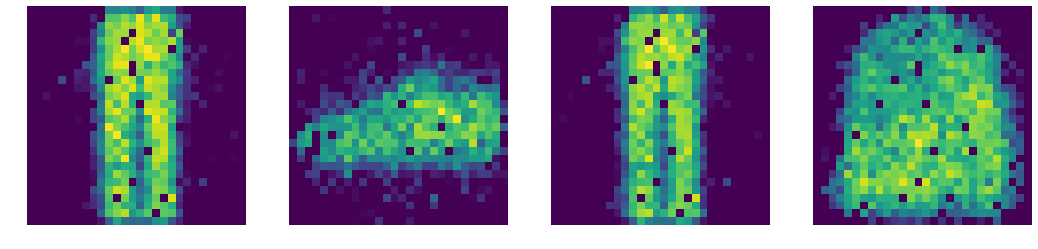

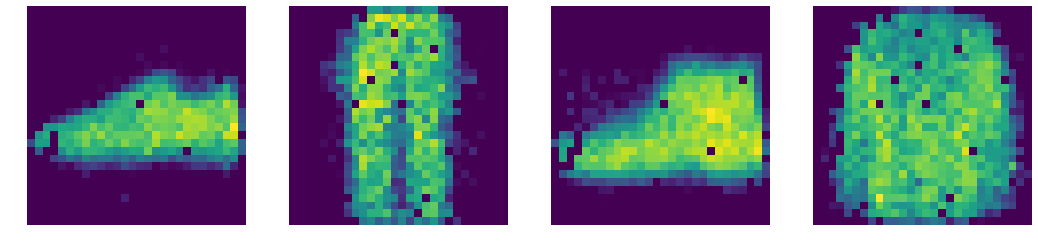

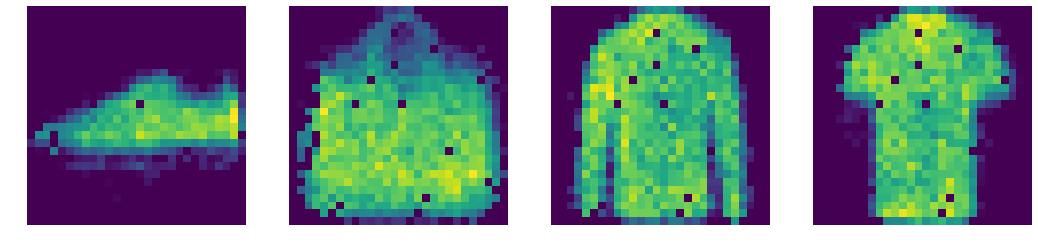

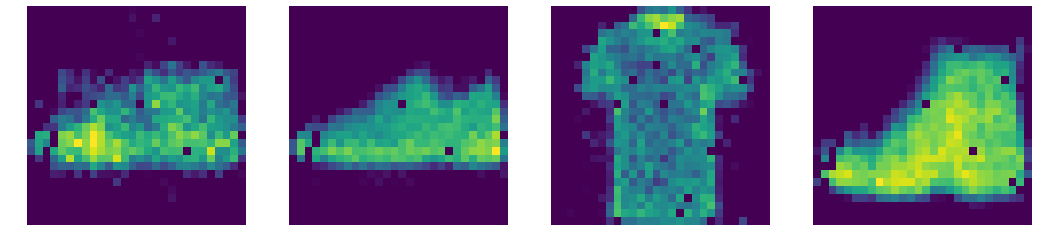

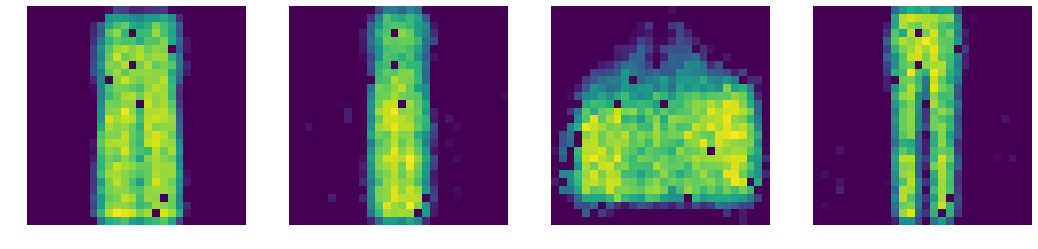

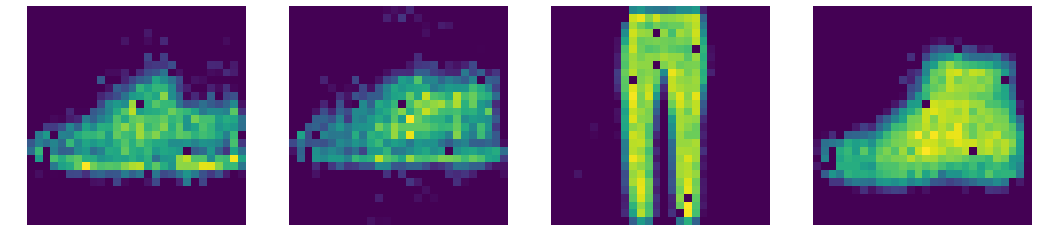

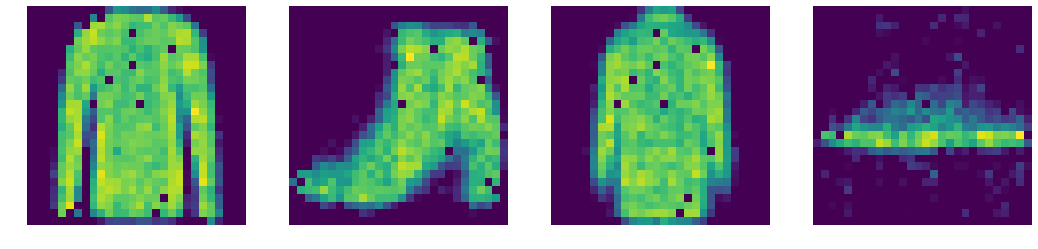

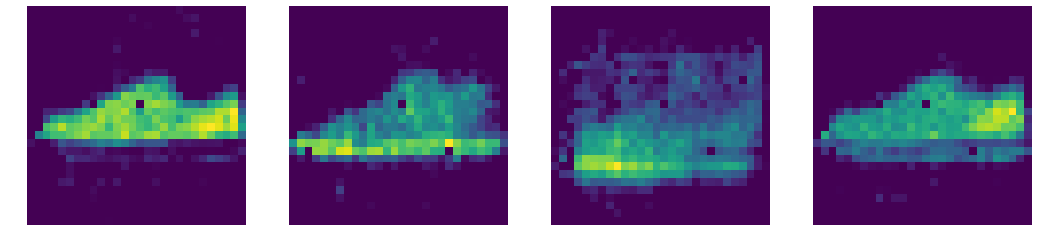

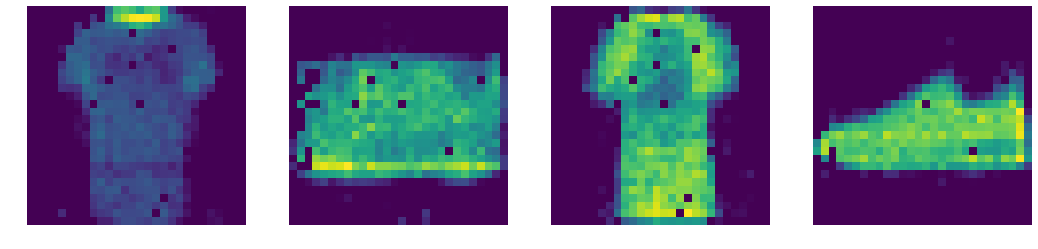

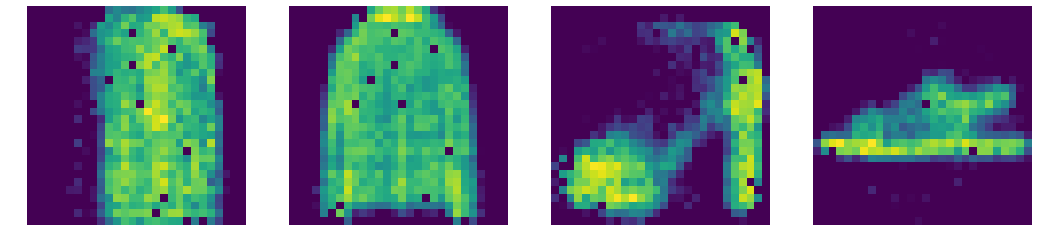

In [72]:
import seaborn
num_epochs = 10
lst =[]

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
        img = img.view(img.size(0), -1)
        output = model_ae(img)  
        loss = criterion(output, img.data)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss.item():.4f}')
    display_images(None, output)
    lst.append(loss.item())


In [73]:
lst

[0.04154260456562042,
 0.028743259608745575,
 0.02500593475997448,
 0.02227761596441269,
 0.021358206868171692,
 0.020038284361362457,
 0.01896991766989231,
 0.01801731437444687,
 0.017991505563259125,
 0.016701919957995415]

No handles with labels found to put in legend.


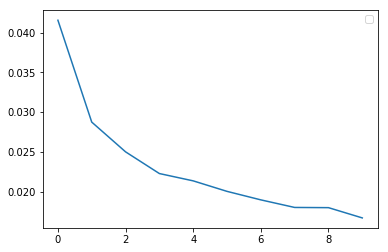

In [74]:
    
    plt.plot(lst)

    # Add a legend
    plt.legend()

    # Show the plot
    plt.show()

In [75]:
from torch.autograd import Variable
plt.style.use('default')
%matplotlib inline 

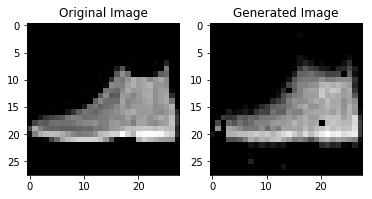

In [76]:
test_images, labels = next(iter(testloader))

test_images = Variable(test_images.view(test_images.size()[0], -1))
test_output = model_ae(test_images)
  
inp = test_images.view(-1, 28, 28)
out = test_output.view(-1, 28, 28)

fig = plt.figure()
plot = fig.add_subplot(1, 2, 1)
plot.set_title('Original Image')
imgplot = plt.imshow(inp[0].cpu(), cmap='gray')

plot = fig.add_subplot(1, 2, 2)
plot.set_title('Generated Image')
imgplot = plt.imshow(out[0].cpu().detach(), cmap='gray')
plt.show()

In [77]:
class CNN_AutoEncoder(nn.Module):
    def __init__(self):
        super(CNN_AutoEncoder, self).__init__()
        self.encoder = nn.Sequential(nn.Conv2d(1,32, kernel_size=5), 
                                        nn.ReLU(),
                                        nn.Conv2d(32, 64, kernel_size = 5),
                                        nn.ReLU())
                                        
        self.decoder = nn.Sequential( nn.ConvTranspose2d(64,32, kernel_size=5), 
                                        nn.ReLU(),
                                        nn.ConvTranspose2d(32, 1, kernel_size = 5),
                                        nn.ReLU())

           # Add your modules here.
      
      # self.linear = nn.Linear(4*4*64, num_classes)
      
      
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

    

In [79]:
model_CNNae = CNN_AutoEncoder()

In [80]:
# Configure the optimiszer and criterion
learning_rate = 1e-3

optimizer = torch.optim.Adam(model_CNNae.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

epoch [1/10], loss:0.0110
epoch [2/10], loss:0.0055
epoch [3/10], loss:0.0041
epoch [4/10], loss:0.0035
epoch [5/10], loss:0.0029
epoch [6/10], loss:0.0026
epoch [7/10], loss:0.0025
epoch [8/10], loss:0.0021
epoch [9/10], loss:0.0027
epoch [10/10], loss:0.0017


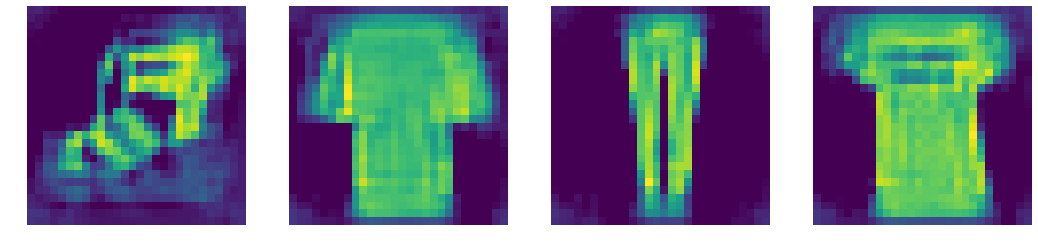

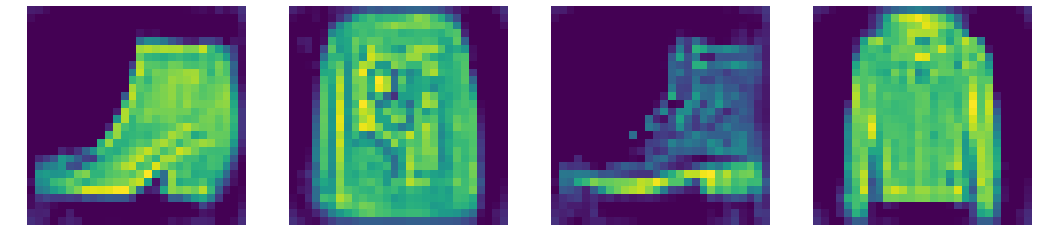

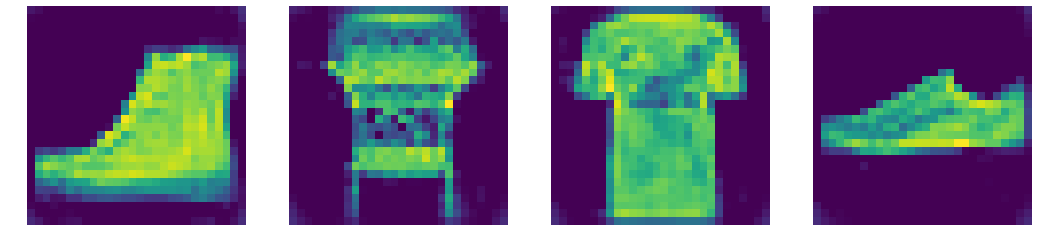

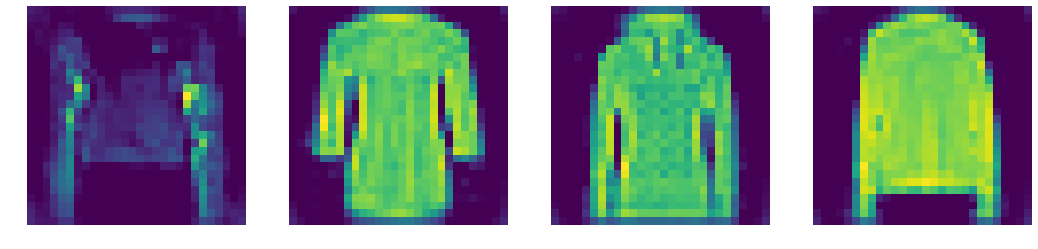

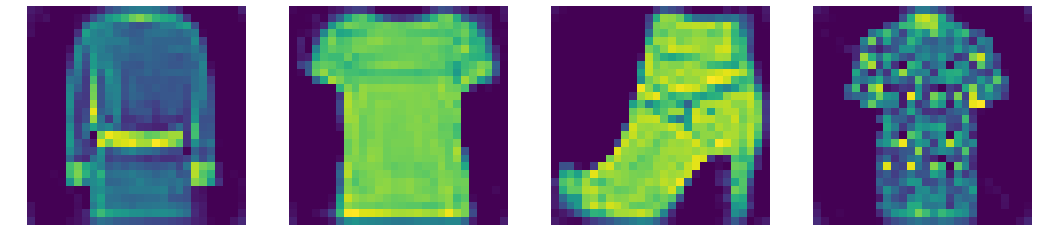

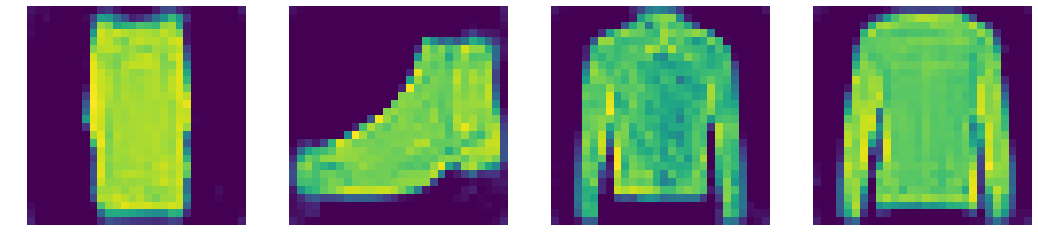

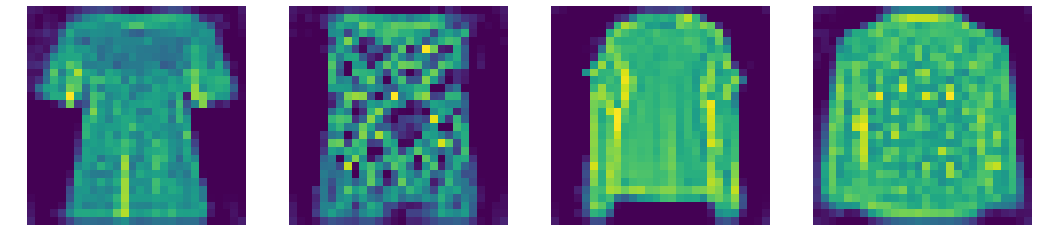

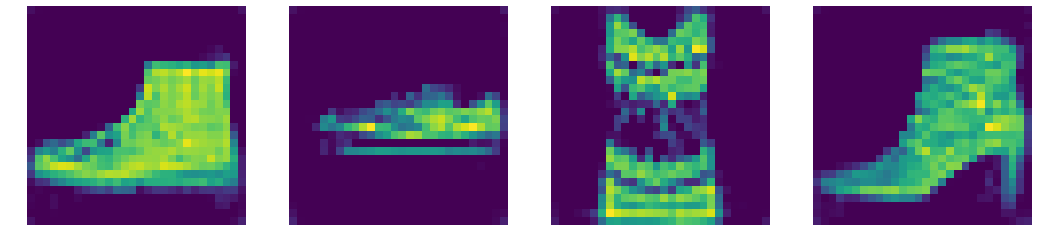

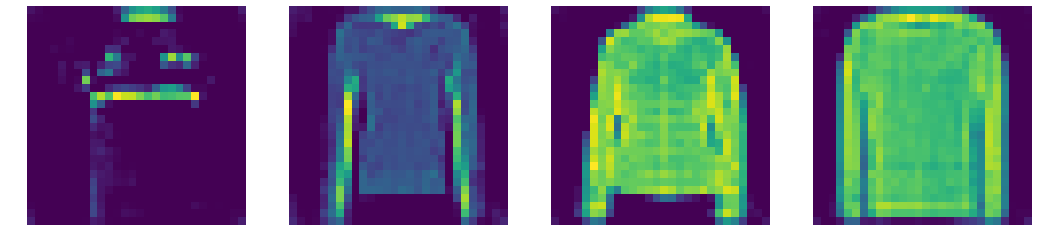

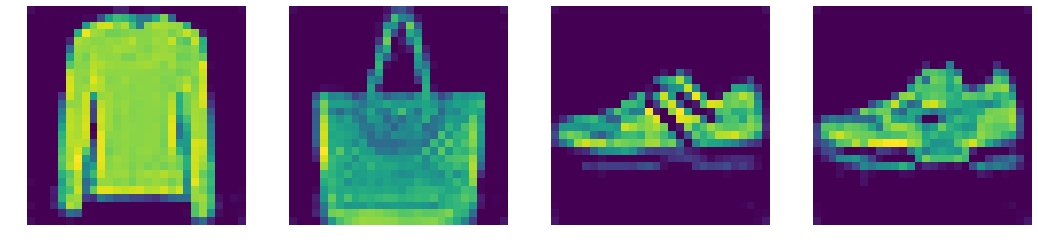

In [81]:
num_epochs = 10
lst1 = []

for epoch in range(num_epochs):
    for data in trainloader:
        img, _ = data
        img.requires_grad_()
#         img = img.view(img.size(0), -1)
        output = model_CNNae(img)  
        loss2 = criterion(output, img.data)
        optimizer.zero_grad()
        loss2.backward()
        optimizer.step()
    # ===================log========================
    print(f'epoch [{epoch + 1}/{num_epochs}], loss:{loss2.item():.4f}')
    display_images(None, output)
    lst1.append(loss2.item())

No handles with labels found to put in legend.


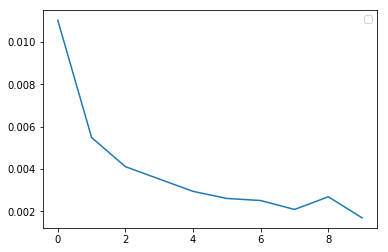

In [82]:
plt.plot(lst1)

# Add a legend
plt.legend()

# Show the plot
plt.show()